# Multi column test

## Environment
- Python 3.12/3.13
    - locale and pandas have updated
- Pands 2.1.4/2.1.2
 
## Test case
- Add custom index to test df result_type='expand' 

In [2]:
# Common module and data initial
import pandas as pd
import locale
import timeit
import matplotlib.pyplot as plt
import numpy as np # For calculating mean and standard deviation

locale.setlocale(locale.LC_ALL, "")

def create_new_df_test():
    df_test = pd.DataFrame([
      {'dir': '/Users/uname1', 'size': 994933},
      {'dir': '/Users/uname2', 'size': 109338711},
    ], index=['A', 'B']) # Custom index
    return df_test
    
# List current version used
print('Pandas', pd.__version__)
!python --version

Pandas 2.1.4
Python 3.12.10


In [3]:
#
# sizes apply by columns, 
# 

def sizes_apply_by_cols(s):
    s['size_kb'] = s['size'].astype(int).apply(lambda x: locale.format_string("%.1f", x / 1024.0, grouping=True) + ' KB')
    s['size_mb'] = s['size'].astype(int).apply(lambda x: locale.format_string("%.1f", x / 1024.0 ** 2, grouping=True) + ' MB')
    s['size_gb'] = s['size'].astype(int).apply(lambda x: locale.format_string("%.1f", x / 1024.0 ** 3, grouping=True) + ' GB')
    return  s

def test_sizes_apply_by_cols():
    df = create_new_df_test()
    df = sizes_apply_by_cols(df)
    return(df)

# print(df := test_sizes_apply_by_cols())

In [4]:
#
# sizes apply by series, 
# 

def sizes_apply_by_series(s):
    s['size_kb'] = locale.format_string("%.1f", s['size'] / 1024.0, grouping=True) + ' KB'
    s['size_mb'] = locale.format_string("%.1f", s['size'] / 1024.0 ** 2, grouping=True) + ' MB'
    s['size_gb'] = locale.format_string("%.1f", s['size'] / 1024.0 ** 3, grouping=True) + ' GB'
    return s

def test_sizes_apply_by_series():
    df = create_new_df_test()
    df = df.apply(sizes_apply_by_series, axis=1)
    return(df)

# print(df := test_sizes_apply_by_series())

In [5]:
#
# sizes apply by tuple, 
# 

def sizes_by_tuple(s):
    return locale.format_string("%.1f", s / 1024.0, grouping=True) + ' KB', \
        locale.format_string("%.1f", s / 1024.0 ** 2, grouping=True) + ' MB', \
        locale.format_string("%.1f", s / 1024.0 ** 3, grouping=True) + ' GB'

def test_sizes_by_tuple():
    df = create_new_df_test()
    df['size_kb'],  df['size_mb'], df['size_gb'] = \
        zip(*df['size'].apply(sizes_by_tuple))
    return(df)

# print(df := test_sizes_by_tuple())

# timeit 
- peformance test

In [7]:
# timeit simple test 

f = test_sizes_apply_by_cols
print(f.__name__)
%timeit f

f = test_sizes_apply_by_series
print(f.__name__)
%timeit f

f = test_sizes_by_tuple
print(f.__name__)
%timeit f

test_sizes_apply_by_cols
22.9 ns ± 1.14 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
test_sizes_apply_by_series
24.6 ns ± 1.82 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
test_sizes_by_tuple
24.5 ns ± 2.61 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [13]:
#
# add_timeit() to generate df_performance
#

plt.rcParams['figure.figsize'] = (10, 6) # Set default figure size
# --- Configuration for timeit runs ---

common_setup = """
import pandas as pd
import numpy as np
from __main__ import create_new_df_test
from __main__ import test_sizes_apply_by_cols, sizes_apply_by_cols
from __main__ import test_sizes_apply_by_series, sizes_apply_by_series
from __main__ import test_sizes_by_tuple, sizes_by_tuple
"""

number_of_executions = 1000  # Number of times to execute stmt for each run
repeat_measurements = 7    # Number of times to repeat the whole execution (to get std dev)

def add_timeit(f):
# --- Collect results ---  
    s = f.__name__ +'()'
    # print(s)
    times_sum = timeit.repeat(
        stmt=f,
        setup=common_setup,
        number=number_of_executions,
        repeat=repeat_measurements
    )
    results= {
        'Method': s,
        'Average Time (s)': np.mean(times_sum),
        'Std Dev (s)': np.std(times_sum)
    }
    
    # print("Performance Results:")
    # print(results)
    return results

results = []
results.append(add_timeit(test_sizes_apply_by_cols))
results.append(add_timeit(test_sizes_apply_by_series))
results.append(add_timeit(test_sizes_by_tuple))
df_performance = pd.DataFrame(results)
print(df_performance)

                         Method  Average Time (s)  Std Dev (s)
0    test_sizes_apply_by_cols()          1.389462     0.055889
1  test_sizes_apply_by_series()          3.230385     0.104173
2         test_sizes_by_tuple()          1.043548     0.049626



--- Plotting Directly with Matplotlib ---


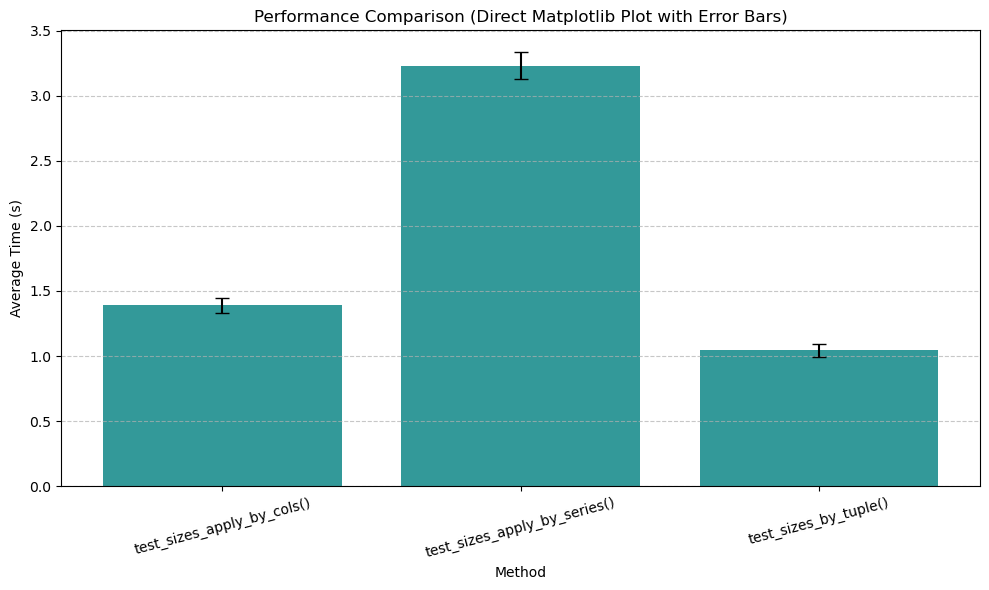

In [15]:
#
# Plot result from df_performance
#

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Typically imported with matplotlib for numerical operations

print("\n--- Plotting Directly with Matplotlib ---")

plt.figure(figsize=(10, 6))

# Extract data directly from the DataFrame
methods = df_performance['Method']
avg_times = df_performance['Average Time (s)']
std_devs = df_performance['Std Dev (s)']

# Create the bar plot using matplotlib.pyplot.bar()
plt.bar(
    x=methods,             # Categories for the x-axis
    height=avg_times,      # Heights of the bars (y-values)
    yerr=std_devs,         # Error bar values
    capsize=5,             # Add caps to the error bars for better visibility
    color='teal',          # Set a bar color
    alpha=0.8              # Adjust transparency
)

# Add labels and title
plt.title('Performance Comparison (Direct Matplotlib Plot with Error Bars)')
plt.xlabel('Method')
plt.ylabel('Average Time (s)')
plt.xticks(rotation=15) # Rotate x-axis labels if needed for readability
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for readability

plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()